### Storing capability experiments for Hyperdimensional binary vectors.

In this notebook rather than using information from a real-world dataset like ConceptNet or WordNet, we create 'artificial' representations. The reason is that artificially created semantic features simplify the program. 

#### Libraries

In [10]:
import pandas as pd
import csv
import string
import matplotlib.pyplot as plt
import statistics 
import random

import seaborn as sns
sns.set_style('white')

%run EncodingDataset.ipynb
%matplotlib inline

### Experiment 1.
#### One relation - one feature.

In this experiments we measure the storing capability of HD vectors by storing semantic features of the following form: 

$$Semantic Feature = Relation_0 · Feature_0 + ... + Relation_n · Feature_n $$

We change the notation for:

$$SemFeat = A·a + B·b + ... + Z·z$$

After encoding and storing these artificially generated semantic features, we proceed to recover the **feature value** (lowercase variables) by multiplying for the **relation literals** (uppercase):

$$A · SemFeat = a + noise$$

### Auxiliar functions

#### Generating literals (upper or lowercase)

In [11]:
def list_symbols (n, rel_or_feat):
    """n is the number of symbols the returning list will have. \ 
    if n < 26, output: 'A',...'Z'... 26 < n < 52 'AA', 'AB',... 'AZ'"""
    if rel_or_feat == "rel":
        StringUpper = string.ascii_uppercase
    elif rel_or_feat == 'feat':
        StringUpper = string.ascii_lowercase
    
    if n <= 26:
        return list( StringUpper[:n] )
    else:
        L = list(StringUpper[:n])
        for i in range(n // 26):
            l_aux = [StringUpper[i] + x for x in StringUpper[0: n - (i+1)*26]]
            L.extend(l_aux)
    return L


### Single test

In [12]:
# Selecting dimmensionality of HD vectors
N = 10000
# Selecting number of pairs:
n_pair = 15

# Generating lower and upper case symbols
relations = list_symbols(n_pair, "rel")
feats = list_symbols(n_pair, "feat")

# Creating the concepts definition on appropiate format.
feat_list = list(map(list, zip(relations,feats)))
FeatMatt = [[['concepto', x[0], x[1]] for x in feat_list]]

# Encoding HD vectors  
Init_mem( ['concepto'] + relations + feats, FeatMatt, 2, N)

## Retrieving information
counter = 0 # Success counter

for rel in relations:
    retrieve = Dict['concepto'] ** Dict[rel]
    retrievedSP = retrieve.getLabelID()
    if len(retrievedSP) == 1 and retrievedSP[0][0] == rel.lower():
        counter += 1

print('Total retrieved pairs:', counter)
print('Percentage: {} %'.format( counter / len(relations) * 100 ))

Total retrieved pairs: 15
Percentage: 100.0 %


### Main Loop for several tests

We also measure the precision and recall of the readings.

In [13]:
L_plot_Precision = []
L_plot_Recall = []
for N in [2000, 5000, 7000, 10000]: # (2000,11000,2000):
    L_Precision = []
    L_Recall = []
    for n_pair in range(20,85,5):
        # List of relations and features (artificial)
        relations = list_symbols(n_pair, "rel")
        feats = list_symbols(n_pair, "feat")
        feat_list = list(map(list, zip(relations,feats)))
        #Feature matrix for 1 concept
        FeatMatt = [[['concepto', x[0], x[1]] for x in feat_list]]
        # Encoding dataset
        Init_mem( ['concepto'] + relations + feats, FeatMatt, 2, N)
        
        # Bucle de pruebas de recuperación
        counter_p = 0 # Contador de recuperaciones exitosas
        counter_r = 0 # contador de recall
        for rel in relations:
            retrieve = Dict['concepto'] ** Dict[rel]
            retrievedSP = retrieve.getLabelID()
            if len(retrievedSP) == 1 and retrievedSP[0][0] == rel.lower():
                counter_p += 1  #counter de precision... 
                counter_r += 1  # counter de recall
            elif len(retrievedSP) == 1 and retrievedSP[0][0] != rel.lower() :
                counter_p += 0
                counter_r += 0
            elif len(retrievedSP) > 1:
                inter = set([xx[0] for xx in retrievedSP]).intersection(set([rel.lower()]))
                counter_p = len(inter) / len(retrievedSP)
                counter_r = len(inter) 
                
        L_Precision.append(counter_p / len(relations) )
        L_Recall.append(counter_r / len(relations) )
        print('\nPara N = {} y n_pair = {}: \nPrecision: {}\nRecall: {}'.format(N, n_pair,
                                                                                counter_p / len(relations),
                                                                                counter_r / len(relations)))
    L_plot_Precision.append(L_Precision)
    L_plot_Recall.append(L_Recall)


Para N = 2000 y n_pair = 20: 
Precision: 1.0
Recall: 1.0

Para N = 2000 y n_pair = 25: 
Precision: 1.0
Recall: 1.0

Para N = 2000 y n_pair = 30: 
Precision: 0.9666666666666667
Recall: 0.9666666666666667

Para N = 2000 y n_pair = 35: 
Precision: 0.9142857142857143
Recall: 0.9142857142857143

Para N = 2000 y n_pair = 40: 
Precision: 0.875
Recall: 0.875

Para N = 2000 y n_pair = 45: 
Precision: 0.7
Recall: 0.7111111111111111

Para N = 2000 y n_pair = 50: 
Precision: 0.66
Recall: 0.66

Para N = 2000 y n_pair = 55: 
Precision: 0.7090909090909091
Recall: 0.7090909090909091

Para N = 2000 y n_pair = 60: 
Precision: 0.5
Recall: 0.5

Para N = 2000 y n_pair = 65: 
Precision: 0.4307692307692308
Recall: 0.4307692307692308

Para N = 2000 y n_pair = 70: 
Precision: 0.44285714285714284
Recall: 0.44285714285714284

Para N = 2000 y n_pair = 75: 
Precision: 0.3333333333333333
Recall: 0.3333333333333333

Para N = 2000 y n_pair = 80: 
Precision: 0.3125
Recall: 0.3125

Para N = 5000 y n_pair = 20: 
Precis

### Ploting

Because an image is worth a thousands words

**Precision**

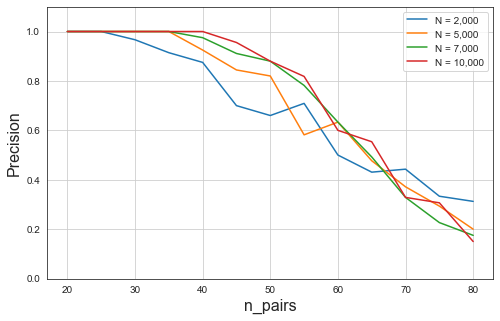

In [14]:
fig= plt.figure(figsize=(8,5))

for Y in L_plot_Precision:
    plt.plot(range(20,85,5), Y)

plt.grid()
plt.ylabel('Precision', fontsize = 16)
plt.ylim(0, 1.1)
plt.xlabel('n_pairs', fontsize = 16)
plt.legend(['N = 2,000', 'N = 5,000', 'N = 7,000', 'N = 10,000'])
plt.savefig('Figure 1', dpi=500)
#plt.show()

**Recall**

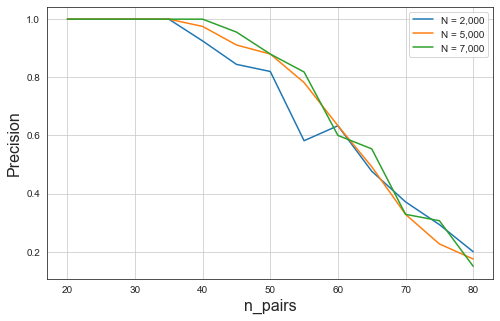

In [15]:
fig= plt.figure(figsize=(8,5))

for Y in L_plot_Recall[1:]:
    plt.plot(range(20,85,5), Y)

plt.grid()
plt.ylabel('Precision', fontsize = 16)
plt.xlabel('n_pairs', fontsize = 16)
plt.legend(['N = 2,000', 'N = 5,000', 'N = 7,000', 'N = 10,000'])
plt.savefig('Figure 1', dpi=500)
#plt.show()

## Experiment 2.

### Same relation multiplying several features.

A common case in the encoding of semantic features is that several features are associated to the same relation:

$$ SemFeat = A · a + A · b + A · c + B · d + B · e + B · f $$ 

In this experiment we measure how the storing and retrieving of features changes with these types of semantic features (which are actually more common than the former). 

### Single relation.
The easiest case:

$$ SemFeat = A · a + A · b + ... + A · z$$

In [16]:
# Dimensionality of vectors
N = 10000

# Number of features
n_feats = 40

# Relation (times n_feats)
relations = ['A'] * n_feats

# Features
feats = list_symbols(n_feats, "feat")

# Creating 'definition' (giving appropiate format)
feat_list = list(map(list, zip(relations,feats)))
FeatMatt = [[['concept', x[0], x[1]] for x in feat_list]]

# Encoding
Init_mem( ['concept'] + relations + feats, FeatMatt, 2, N)


# Retrieving loop
for rel in set(relations):
    retrieve = Dict['concept'] ** Dict[rel]
    retrievedSP = retrieve.getLabelID()
    #print(retrievedSP)
    if len(retrievedSP) == n_feats:
        print('All retrieved successfully!')


All retrieved successfully!


### General case

There are multiple ways of combining a set of relations with a set of features. 
In this second experiment we developed several auxiliar functions for creating such combinations and then performed storing and retrieving operations to measure precision and recall. 

### Auxiliar functions

**Mixing relations with multiple features**

In [17]:
def mix_1rel (relation, L_features):
    """"Dado una relación (ej. ['A']) y una lista de features (ej. ['a','b','c']) 
    regresa la lista de la combinación entre ambos (ej. [['A','a'], ['B,b'],['C','c']] )"""
    z = zip(relation * len(L_features), L_features)
    return list(map(list, z))

# Example
mix_1rel(['A'], ['a','b','c'])

[['A', 'a'], ['A', 'b'], ['A', 'c']]

**Extending lists**

This function combines a vector like: `[['A','a], ['A','b']]` 

with the vector `[ [['B','c'], ['C','d'], ['C','e']], [['B','c'], ['B','d'], ['C','e']]]` 

To obtain the list:

`[ [['A','a], ['A','b'], ['B','c'], ['C','d'], ['C','e']],  
   [['A','a], ['A','b'], ['B','c'], ['B','d'], ['C','e']]]` 

In [18]:
def mix_many_rels (L_1rel, L_many_rels):
    "Combinación de listas"
    for x in L_many_rels:
        x.extend(L_1rel)
        x.sort()
    return L_many_rels

# Example
mix_many_rels([['A','a'], ['A','b']], [ [['B','c'], ['C','d'], ['C','e']], [['B','c'], ['B','d'], ['C','e']] ])

[[['A', 'a'], ['A', 'b'], ['B', 'c'], ['C', 'd'], ['C', 'e']],
 [['A', 'a'], ['A', 'b'], ['B', 'c'], ['B', 'd'], ['C', 'e']]]

#### Recursive function for getting all the combinations between relations / features

In [19]:
def recursive_mixing (L_rel, L_feat):
    "Find all the possible ways to combine a set of relations and features"
    # Caso base:
    if len(L_rel) == 1:
        return [mix_1rel(L_rel, L_feat)]
    else:
        Acum = []  # Acumulador de resultados parciales
        for i in range(len(L_feat) // len(L_rel)):
            aux = mix_many_rels( mix_1rel([L_rel[0]], L_feat[:i+1]), recursive_mixing(L_rel[1:], L_feat[i+1:]) )
            
            # Guarda resultado parcial
            Acum.extend(aux)
        return Acum

# Example
recursive_mixing(['A','B','C'], ['a','b','c','d','e','f'])

[[['A', 'a'], ['B', 'b'], ['C', 'c'], ['C', 'd'], ['C', 'e'], ['C', 'f']],
 [['A', 'a'], ['B', 'b'], ['B', 'c'], ['C', 'd'], ['C', 'e'], ['C', 'f']],
 [['A', 'a'], ['A', 'b'], ['B', 'c'], ['C', 'd'], ['C', 'e'], ['C', 'f']],
 [['A', 'a'], ['A', 'b'], ['B', 'c'], ['B', 'd'], ['C', 'e'], ['C', 'f']]]

#### Precision and recall metrics

In [20]:
def retrieved_metrics (combination, relt, retrieved):
    """"Dada la lista de combinacion actual, la relacion en cuestion y los vectores recuperados da un valor
     de desempeño de la recuperacion"""
    # Se obtiene una lista de features asociados a la relacion:
    features_relevant = [x[1] for x in combination if x[0] == relt]
    # Se obtiene lista de features recuperados
    features_retrieved = [x[0] for x in retrieved]
    # Se encuentra la intersección entre ambas listas
    intersection = set(features_relevant).intersection(set(features_retrieved))
    
    # Precision & Recall
    if len(features_retrieved) > 0:
        Prec = len(intersection) / len (features_retrieved)
        Recall = len(intersection) / len(features_relevant)
    else:
        Prec = 0
        Recall = 0
    
    return (Prec, Recall)

### Main loop

In [21]:
N = 10000 # 2000 5000 7000

L_plot_prec = []
L_plot_rec = []
for k in range(1):
    print(k)
    L_plot_prec.append([])
    L_plot_rec.append([])
    for n_rels in [1, 5, 10, 20, 30, 38]: 
        for n_feats in [38]: #
            # Relations
            relations = list_symbols(n_rels, "rel")
            # Features
            feats = list_symbols(n_feats, "feat")
            # Generating all possible combinations
            comb = recursive_mixing(relations, feats)
            # Selecting a sample from all combinations (speeding up the process...)
            if len(comb) > 1000:
                comb = random.sample(comb, 1000)
            
            # Internal loop
            # Creating FeattMatt's
            Precision_avgs = [] #arrays de promnedios
            Recall_avgs = []

            for c in comb:
                FeatMatt = [[['concept', x[0], x[1]] for x in c]]
                # Initializing memory
                Init_mem( ['concept'] + relations + feats, FeatMatt, 2, N)
                
                Precision_avgs.append(0)
                Recall_avgs.append(0)

                for rel in relations:
                    retrieve = Dict['concept'] ** Dict[rel]
                    retrievedSP = retrieve.getLabelID()
                    # PRECISION Y RECALL
                    Precision, Recall = retrieved_metrics(c, rel, retrievedSP)
                    
                    Precision_avgs[-1] += Precision
                    Recall_avgs[-1] += Recall
                
                # Mean
                Precision_avgs[-1] /= len(relations) 
                Recall_avgs[-1] /= len(relations)

            # Average value across all combinations
            L_plot_prec[k].append( statistics.mean(Precision_avgs))
            L_plot_rec[k].append(statistics.mean(Recall_avgs))
            print('\nN = {}, n_rel = {}, n_feat = {}:'.format(N, n_rels, n_feats))
            print('Mean Precision: {}, Mean Recall: {} \n'.format(L_plot_prec[-1][-1], L_plot_rec[-1][-1])) 

0

N = 10000, n_rel = 1, n_feat = 38:
Mean Precision: 1.0, Mean Recall: 1.0 


N = 10000, n_rel = 5, n_feat = 38:
Mean Precision: 1.0, Mean Recall: 0.9980207157215463 


N = 10000, n_rel = 10, n_feat = 38:
Mean Precision: 0.9995, Mean Recall: 0.9978907665537077 



KeyboardInterrupt: 

### Converting to Numpy Array

In [ ]:
Prec = np.array(list(map(np.array, L_plot_prec)))
Recc = np.array(list(map(np.array, L_plot_rec)))

# Mean across axis 0
Prec_mean = Prec.mean(0) 
Recc_mean = Recc.mean(0) 

print('Precision:', Prec_mean)
print('Recall:', Recc_mean)

### Plotting 

Precision and recall in the same figure. 
Fixed values: `N = 10,000` and `n_feats = 38`

In [ ]:
%matplotlib inline

fig= plt.figure(figsize=(19,10))

plt.plot([1, 3, 5, 10, 15, 20, 25, 30, 35], Prec_mean, 'b-')
plt.plot([1, 3, 5, 10, 15, 20, 25, 30, 35], Recc_mean, 'k--')
    
plt.ylim(0, 1.1)
plt.legend(['N = 10,000']) #, 'N = 5,000', 'N = 7,000', 'N = 10,000'])
plt.grid()
#plt.show()

In [ ]:
print(Prec_mean)

In [ ]:
print(Recc_mean)

### Final Plots 

#### Precision

In [ ]:
x = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40]

P_mean_2000  = [1. , 0.99820789, 0.9864  ,  0.97261667,  0.956  ,  0.9434, 0.92522667, 0.91351436 , 0.90714286 , .88684211 ]
P_mean_5000  = [1. ,  1. , 0.997,  0.9949 ,  0.99233333, 0.987,  0.98388, 0.98181024 , 0.98642857 , 0.97631579 ]
P_mean_7000  = [1. ,  1. , 0.999,  0.998 ,  0.99673333, 0.995, 0.99464, 0.99244694 , 0.98714286 , 0.98947368 ]
P_mean_10000 = [1. , 0.99982079, 0.99979 ,  0.9995  ,   0.99928667, 0.9989825, 0.99848, 0.99845194, 0.99642857, 1 ] 


# Plotting
fig = plt.figure(figsize=(19,10))

plt.plot(x, P_mean_2000, x, P_mean_5000, x, P_mean_7000, x, P_mean_10000)

plt.ylim(0, 1.1)
plt.legend(['N = 2,000', 'N = 5,000', 'N = 7,000', 'N = 10,000'], fontsize = 12)
plt.ylabel('Precision', fontsize = 16)
plt.xlabel('n_rels', fontsize = 16)
plt.grid()

#### Recall

In [ ]:
x = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40]

R_mean_2000  = [0.86842105 , 0.90620521 , 0.89919717 , 0.90016827 , 0.89808042 , 0.90260046, 0.89985372, 0.90007753, 0.90047619, .88684211]
R_mean_5000  = [0.97368421, 0.98014012, 0.97788565, 0.9792347, 0.9793377, 0.977667, 0.9784401, 0.97873613, 0.9839881,  0.97631579 ]
R_mean_7000  = [0.94736842, 0.99373221, 0.9925481,  0.99182344, 0.991687, 0.991769, 0.99231132, 0.99121907, 0.98678571, 0.98947368]
R_mean_10000 = [0.99868421, 0.99789051, 0.9980083,  0.99802065, 0.99809504, 0.99806192, 0.99793215, 0.99815142 ,0.99642857, 1]

fig = plt.figure(figsize=(19,10))

plt.plot(x, R_mean_2000, x, R_mean_5000, x, R_mean_7000, x, R_mean_10000)

plt.ylim(0, 1.1)
plt.legend(['N = 2,000', 'N = 5,000', 'N = 7,000', 'N = 10,000'], fontsize = 12)
plt.ylabel('Recall', fontsize = 16)
plt.xlabel('n_rels', fontsize = 16)
plt.grid()

**Precision & Recall for N = 2,000**

In [ ]:
fig = plt.figure(figsize=(9,5))

plt.plot(x, P_mean_2000, 'b', x, R_mean_2000, '--r')
plt.ylim(0, 1.1)
plt.xlim(0, 42)
plt.xlabel('Number of relations', fontsize = 14)
# plt.ylabel('Measure')
plt.legend(['Precision', 'Recall'], loc = 5, fontsize = 12)
plt.grid()
plt.savefig('Figure 2', dpi=200)